## Exploratory data analysis 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# improting the CSV data file 

data_01 = pd.read_csv('/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/train.csv')
data_02_c = data_01.copy()


In [3]:
data_02_c.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [4]:
# Get number of columns and rows in the data

num_rows, num_cols = data_02_c.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 54706
Number of columns: 14


In [5]:
# summary of the data types and non-null columns

print(data_02_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [8]:
# descrptive statistics for numerical columns

print(data_02_c.describe(include= 'all'))

             site_id    patient_id      image_id laterality   view  \
count   54706.000000  54706.000000  5.470600e+04      54706  54706   
unique           NaN           NaN           NaN          2      6   
top              NaN           NaN           NaN          R    MLO   
freq             NaN           NaN           NaN      27439  27903   
mean        1.460407  32698.865262  1.079386e+09        NaN    NaN   
std         0.498434  18893.861534  6.183269e+08        NaN    NaN   
min         1.000000      5.000000  6.849100e+04        NaN    NaN   
25%         1.000000  16481.000000  5.458153e+08        NaN    NaN   
50%         1.000000  32432.000000  1.082689e+09        NaN    NaN   
75%         2.000000  48999.000000  1.613228e+09        NaN    NaN   
max         2.000000  65534.000000  2.147472e+09        NaN    NaN   

                 age        cancer        biopsy      invasive        BIRADS  \
count   54669.000000  54706.000000  54706.000000  54706.000000  26286.000000   

In [10]:
# For categorical columns (if any)


categorical_cols = data_02_c.select_dtypes(include = ['object', 'category']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}': ")
    print(data_02_c[col].value_counts(dropna=False))


Unique values in 'laterality': 
laterality
R    27439
L    27267
Name: count, dtype: int64

Unique values in 'view': 
view
MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: count, dtype: int64

Unique values in 'density': 
density
NaN    25236
B      12651
C      12175
A       3105
D       1539
Name: count, dtype: int64


In [11]:
# Null values checkup 

# Total null values per column
null_counts = data_02_c.isnull().sum()

# Percentage of null values per column
null_percent = (data_02_c.isnull().sum() / len(data_02_c)) * 100

# Create a summary DataFrame
null_summary = pd.DataFrame({
    'Column': null_counts.index,
    'Null_Count': null_counts.values,
    'Null_Percent': null_percent.values
})

# Filter columns with missing values (if any)
null_summary = null_summary[null_summary['Null_Count'] > 0]

print("Null Value Summary:")
print(null_summary.sort_values('Null_Percent', ascending=False))

Null Value Summary:
     Column  Null_Count  Null_Percent
9    BIRADS       28420     51.950426
11  density       25236     46.130223
5       age          37      0.067634


/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_2629/4172437626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_df, x='Column', y='Null_Percent', palette='viridis')


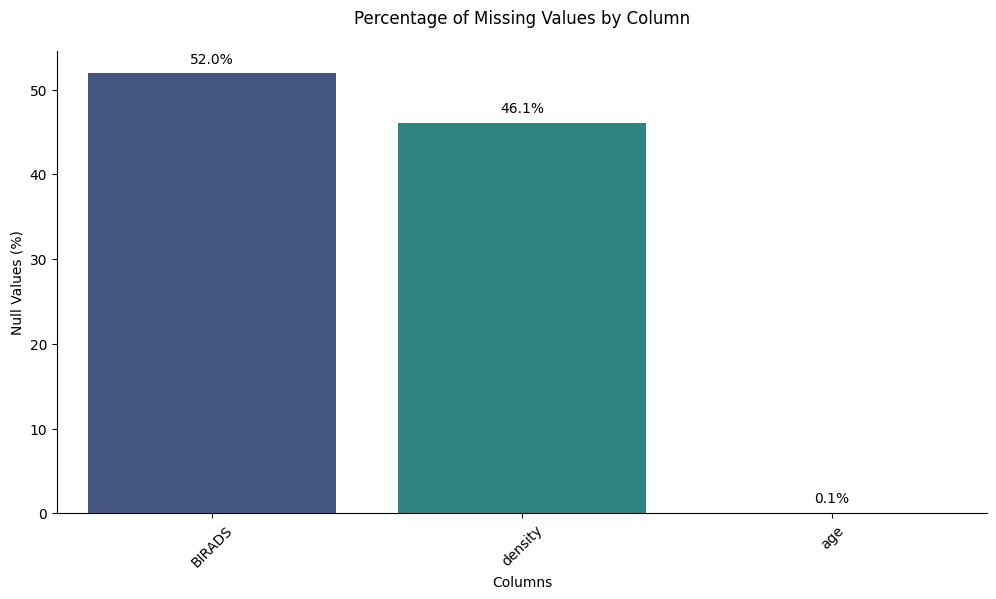

In [13]:
# Calculate null stats
null_counts = data_02_c.isnull().sum()
null_pct = (null_counts / len(data_02_c)) * 100
null_df = pd.DataFrame({'Column': null_counts.index, 'Null_Count': null_counts, 'Null_Percent': null_pct})
null_df = null_df[null_df['Null_Count'] > 0].sort_values('Null_Percent', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=null_df, x='Column', y='Null_Percent', palette='viridis')

# Annotate
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title("Percentage of Missing Values by Column", pad=20)
plt.xlabel("Columns")
plt.ylabel("Null Values (%)")
plt.xticks(rotation=45)
sns.despine()
plt.show()

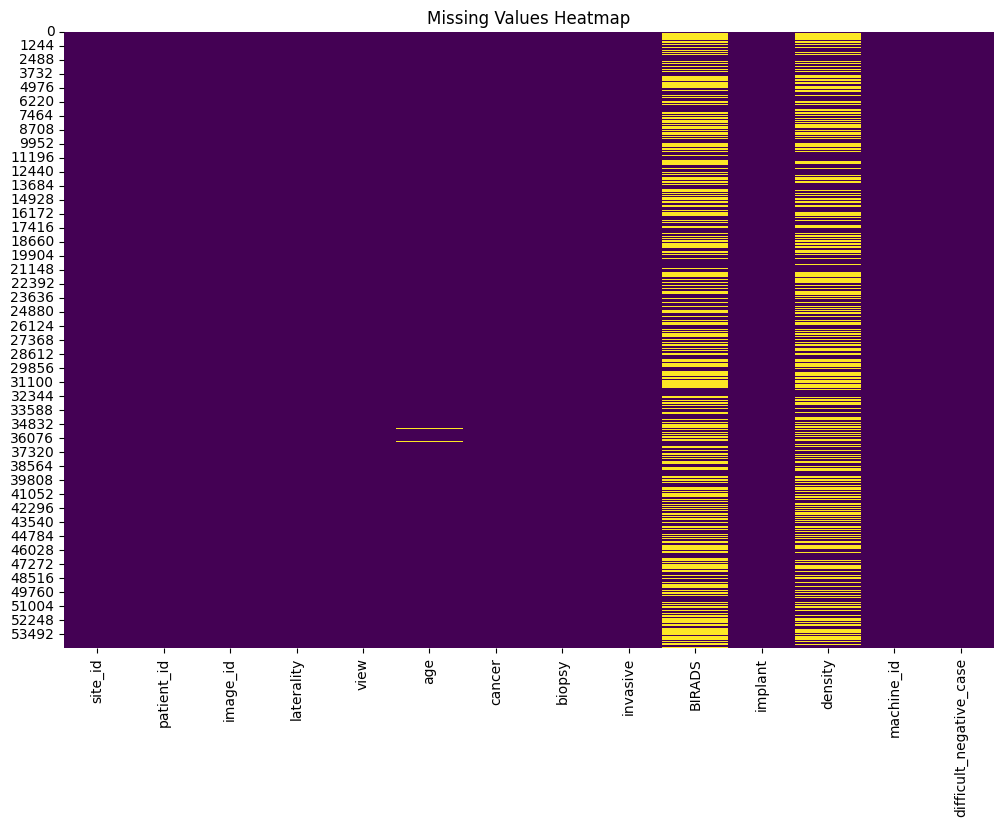

In [14]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_02_c.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_2629/2240341467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=class_df, x='Class', y='Count', palette=['#4ECDC4', '#FF6B6B'])


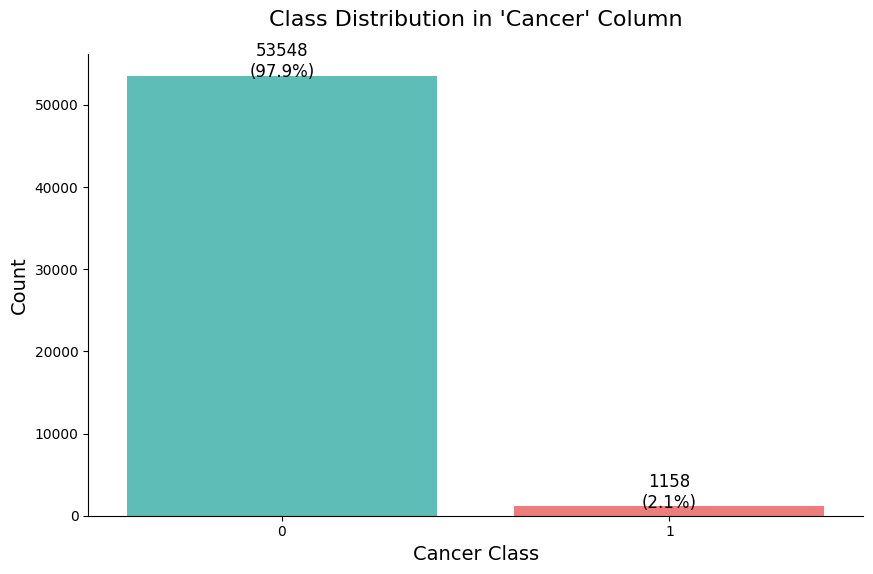

In [17]:
# Check whether the class imblance in cancer column



# Assuming 'cancer' is your target column (e.g., values: 'Malignant', 'Benign')
class_counts = data_02_c['cancer'].value_counts()
class_pct = data_02_c['cancer'].value_counts(normalize=True) * 100

# Create summary DataFrame
class_df = pd.DataFrame({
    'Class': class_counts.index,
    'Count': class_counts.values,
    'Percentage': class_pct.values
})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=class_df, x='Class', y='Count', palette=['#4ECDC4', '#FF6B6B'])

# Annotate bars with counts and percentages
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{class_df['Count'][i]}\n({class_df['Percentage'][i]:.1f}%)",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12
    )

plt.title("Class Distribution in 'Cancer' Column", pad=20, fontsize=16)
plt.xlabel("Cancer Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
sns.despine()
plt.show()

In [23]:
# check weather the cancer patients under the 40 years old

# Filter cancer patients under 30
young_cancer_patients = data_02_c[(data_02_c['cancer'] == 1) & (data_02_c['age'] < 40)]

# Count the number of such patients
count = len(young_cancer_patients)
print(f"Number of cancer patients under 40: {count}")

# Optional: Calculate percentage of all cancer patients
total_cancer_patients = len(data_02_c[data_02_c['cancer'] == 1])
percentage = (count / total_cancer_patients) * 100
print(f"Percentage of cancer patients under 40: {percentage:.2f}%")

Number of cancer patients under 40: 5
Percentage of cancer patients under 40: 0.43%


Cancer patients under 40: 5 (0.4% of all cancer patients)


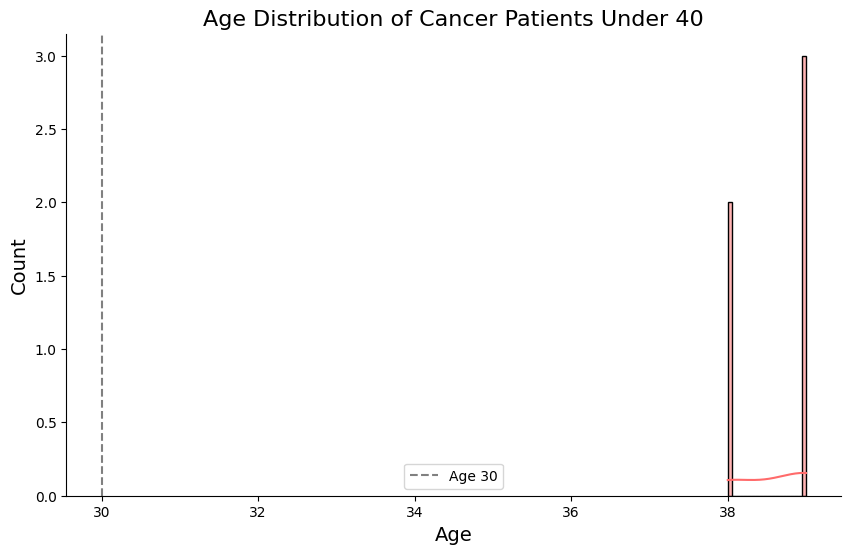

In [27]:
# Filter cancer patients under 40
cancer_under_40 = data_02_c[(data_02_c['cancer'] == 1) & (data_02_c['age'] < 40)]

# Count patients
count = len(cancer_under_40)
total_cancer = len(data_02_c[data_02_c['cancer'] == 1])
percentage = (count / total_cancer) * 100

print(f"Cancer patients under 40: {count} ({percentage:.1f}% of all cancer patients)")



plt.figure(figsize=(10, 6))
sns.histplot(data=cancer_under_40, x='age', bins=20, kde=True, color='#FF6B6B')
plt.title('Age Distribution of Cancer Patients Under 40', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.axvline(x=30, color='gray', linestyle='--', label='Age 30')  # Highlight a threshold
plt.legend()
sns.despine()
plt.show()

Peak age zone: 63-68 (Count: 229)


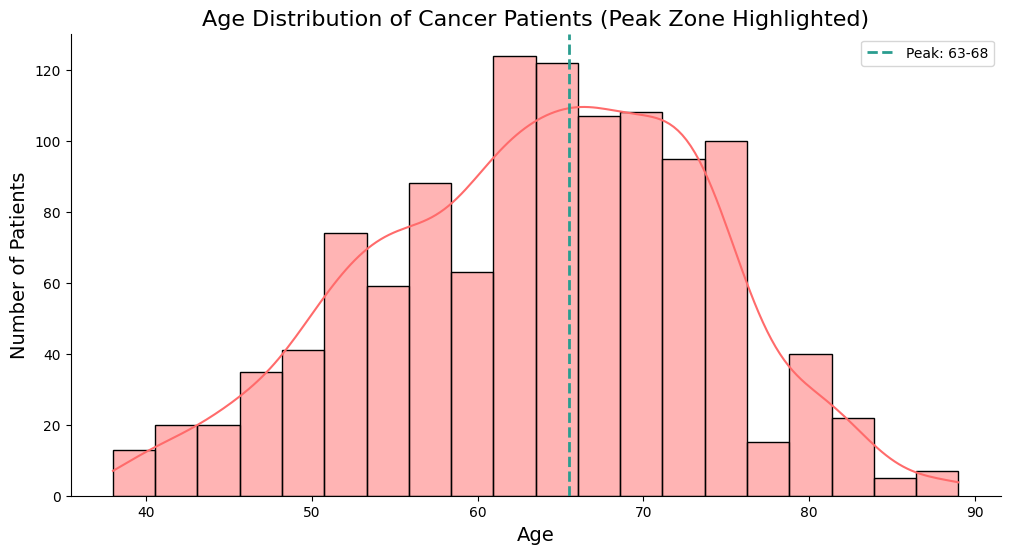

In [30]:
# Showing the largerst value of cancer patients have Age zone

# Filter cancer patients
cancer_patients = data_02_c[data_02_c['cancer'] == 1]

# Calculate age bins with highest counts - using integer bins
age_counts = cancer_patients['age'].value_counts(bins=10, sort=True)

# Convert bins to integer ranges
def format_bin(bin):
    return f"{int(bin.left)}-{int(bin.right)}"

peak_age_bin = age_counts.idxmax()
peak_count = age_counts.max()

# Get integer-formatted bin label
peak_age_label = format_bin(peak_age_bin)
print(f"Peak age zone: {peak_age_label} (Count: {peak_count})")

plt.figure(figsize=(12, 6))
ax = sns.histplot(cancer_patients['age'], bins=20, kde=True, color='#FF6B6B', edgecolor='black')

# Highlight peak age zone (using integer center)
peak_center = (int(peak_age_bin.left) + int(peak_age_bin.right)) / 2
ax.axvline(peak_center, color='#2A9D8F', linestyle='--', linewidth=2, 
          label=f'Peak: {peak_age_label}')

# Annotate peak with integer range
ax.annotate(
    f"Peak: {peak_age_label}\nCount: {peak_count}",
    xy=(peak_center, peak_count),
    xytext=(peak_center + 5, peak_count * 0.9),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=12
)

plt.title('Age Distribution of Cancer Patients (Peak Zone Highlighted)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend()
sns.despine()
plt.show()

In [ ]:


from scipy import stats

# Load your data
# df = pd.read_csv('your_data.csv')

# 1. Calculate multiple outlier thresholds
def detect_outliers(series):
    # Basic statistics
    stats = {
        'mean': series.mean(),
        'median': series.median(),
        'std': series.std(),
        'count': series.count(),
        'missing': series.isna().sum()
    }
    
    # IQR Method (most common)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    iqr_low = Q1 - 1.5 * IQR
    iqr_high = Q3 + 1.5 * IQR
    
    # Z-score method (for normal distributions)
    z_scores = np.abs(stats.zscore(series.dropna()))
    z_threshold = 3
    z_outliers = series[(z_scores > z_threshold)]
    
    # Modified Z-score (for non-normal distributions)
    median = np.median(series.dropna())
    mad = stats.median_absolute_deviation(series.dropna())
    modified_z_scores = 0.6745 * (series - median) / mad
    mod_z_outliers = series[np.abs(modified_z_scores) > 3.5]
    
    # Combine results
    outliers = {
        'iqr_low': iqr_low,
        'iqr_high': iqr_high,
        'iqr_outliers': series[(series < iqr_low) | (series > iqr_high)],
        'z_outliers': z_outliers,
        'mod_z_outliers': mod_z_outliers,
        'stats': stats
    }
    
    return outliers

# 2. Detect outliers
age_outliers = detect_outliers(df['age'])

# 3. Print summary
print(f"Age Statistics:\nMean: {age_outliers['stats']['mean']:.1f}, "
      f"Median: {age_outliers['stats']['median']:.1f}, "
      f"Std: {age_outliers['stats']['std']:.1f}")
print(f"\nIQR Boundaries: [{age_outliers['iqr_low']:.1f}, {age_outliers['iqr_high']:.1f}]")
print(f"Potential Outliers (IQR method): {len(age_outliers['iqr_outliers'])}")
print(f"Potential Outliers (Z-score method): {len(age_outliers['z_outliers'])}")
print(f"Potential Outliers (Modified Z-score): {len(age_outliers['mod_z_outliers'])}")

# 4. Visualize with multiple techniques
plt.figure(figsize=(18, 12))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Boxplot of Age (IQR Method)')
plt.axvline(age_outliers['iqr_low'], color='red', linestyle='--', label='Lower outlier threshold')
plt.axvline(age_outliers['iqr_high'], color='red', linestyle='--', label='Upper outlier threshold')
plt.legend()

# Histogram with KDE
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True, color='lightgreen', bins=30)
plt.title('Age Distribution with Outlier Zones')
plt.axvline(age_outliers['iqr_low'], color='red', linestyle='--')
plt.axvline(age_outliers['iqr_high'], color='red', linestyle='--')

# Z-score visualization
plt.subplot(2, 2, 3)
z_scores = np.abs(stats.zscore(df['age'].dropna()))
sns.scatterplot(x=df['age'].dropna(), y=z_scores, color='orange')
plt.axhline(y=3, color='red', linestyle='--', label='Z-score threshold (3)')
plt.title('Z-scores of Age Values')
plt.ylabel('Absolute Z-score')
plt.legend()

# QQ-plot for normality check
plt.subplot(2, 2, 4)
stats.probplot(df['age'].dropna(), plot=plt)
plt.title('Q-Q Plot for Normality Check')

plt.tight_layout()
plt.show()

# 5. Show the actual outlier values
print("\nSample Outlier Values:")
print(df[df['age'].isin(age_outliers['iqr_outliers'])]['age'].value_counts().head(10))

## Pre-processing stage 